In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [72]:
data= pd.read_csv(r'C:\Users\bluek\OneDrive\Desktop\mulcam\1인가구_data.csv')

In [73]:

# 괄호와 괄호 안의 내용 삭제하고 시, 구, 동 구분하여 칼럼 추가

data[['city_name', 'county_name', 'town_name']] = data['법정구역'].str.replace(r'\(.*\)', '').str.split(' ', expand=True)

# 법정구역 칼럼 삭제
data.drop('법정구역', axis=1, inplace=True)

# 시, 구, 동 칼럼을 맨 앞으로 이동
cols = ['city_name', 'county_name', 'town_name'] + [col for col in data if col not in ['city_name', 'county_name', 'town_name']]
data = data[cols]
data = data.replace("서울특별시", "서울시")
data['town_name'] = data['town_name'].str.replace(r'\([^()]*\)', '', regex=True)

# city_name, county_name, town_name을 제외한 모든 칼럼 선택
columns_to_convert = data.columns.difference(['city_name', 'county_name', 'town_name'])

# 선택한 칼럼들의 데이터를 int로 변환
data[columns_to_convert] = data[columns_to_convert].replace(',', '', regex=True).astype(int)

# CSV 파일로 저장
data.to_csv(r'C:\Users\bluek\OneDrive\Desktop\mulcam\1family_data.csv', index=False)

print("CSV 파일이 성공적으로 생성되었습니다.")

CSV 파일이 성공적으로 생성되었습니다.


In [74]:
# 총세대수가 중간값 이상인 동만 선택
median_total_households = data['총세대수'].median()
top50_towns = data[data['총세대수'] >= median_total_households]


C:\Users\bluek\AppData\Local\Temp\ipykernel_6768\450690312.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top50_towns['비율'] = top50_towns['연령구간세대수'] / top50_towns['총세대수']


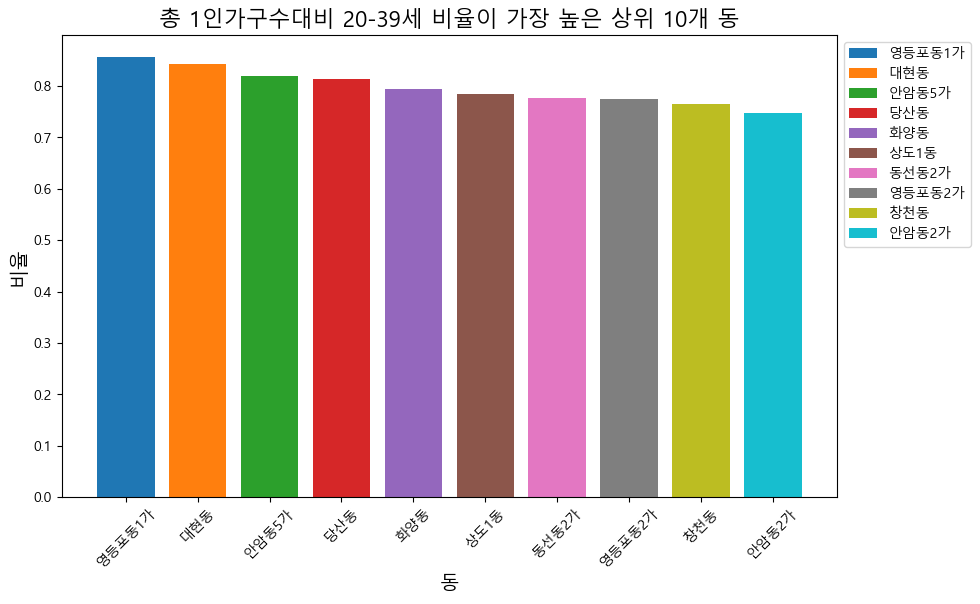

In [90]:
# 비율 계산
top50_towns['비율'] = top50_towns['연령구간세대수'] / top50_towns['총세대수']

# 상위 5개 동 찾기
top10_towns_total_per_age = top50_towns.sort_values(by='비율', ascending=False).head(10)['town_name']

# 상위 5개 동에 대한 시각화
plt.figure(figsize=(10, 6))
for town_name in top10_towns_total_per_age:
    town_data = top50_towns[top50_towns['town_name'] == town_name]
    plt.bar(town_data['town_name'], town_data['비율'], label=town_name)

plt.title('총 1인가구수대비 20-39세 비율이 가장 높은 상위 10개 동', fontsize=16)
plt.xlabel('동', fontsize=14)
plt.ylabel('비율', fontsize=14)
plt.legend()
plt.xticks(rotation=45)
plt.grid(False)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

C:\Users\bluek\AppData\Local\Temp\ipykernel_6768\363890897.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top50_towns['여성비율'] = top50_towns['여_연령구간세대수'] / top50_towns['연령구간세대수']


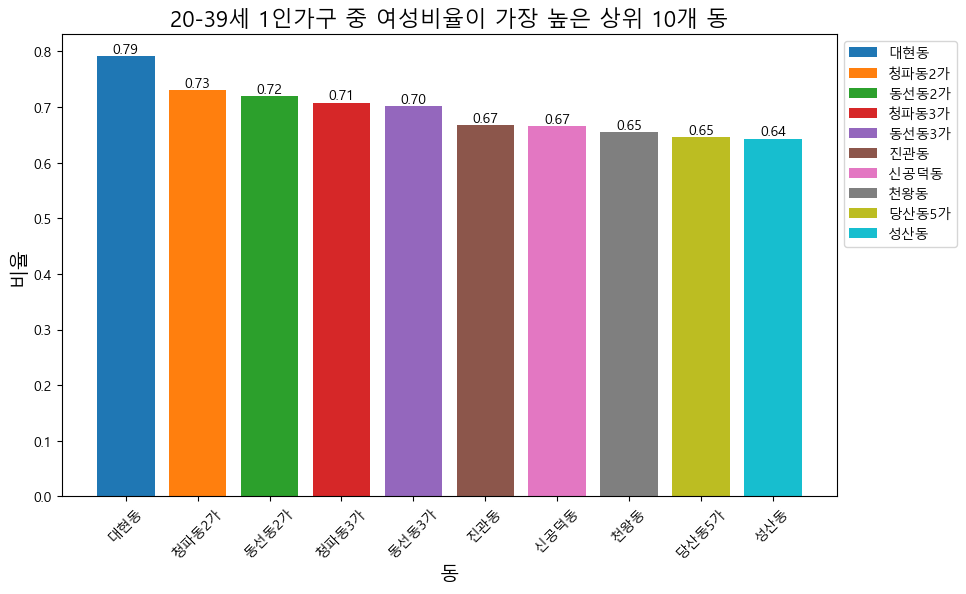

In [88]:
# 비율 계산
top50_towns['여성비율'] = top50_towns['여_연령구간세대수'] / top50_towns['연령구간세대수']

top10_towns_women_ratio = top50_towns.sort_values(by='여성비율', ascending=False).head(10)['town_name']

# 상위 10개 동에 대한 시각화 (막대그래프)
plt.figure(figsize=(10, 6))
for i, town_name in enumerate(top10_towns_women_ratio):
    town_data = top50_towns[top50_towns['town_name'] == town_name]
    plt.bar(i, town_data['여성비율'], label=town_name)

    # 막대 위에 숫자로 비율을 annotation
    plt.text(i, town_data['여성비율'], f'{town_data["여성비율"].values[0]:.2f}', ha='center', va='bottom')

plt.title('20-39세 1인가구 중 여성비율이 가장 높은 상위 10개 동', fontsize=16)
plt.xlabel('동', fontsize=14)
plt.ylabel('비율', fontsize=14)
plt.legend()
plt.xticks(range(len(top10_towns_women_ratio)), top10_towns_women_ratio, rotation=45)
plt.grid(False)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


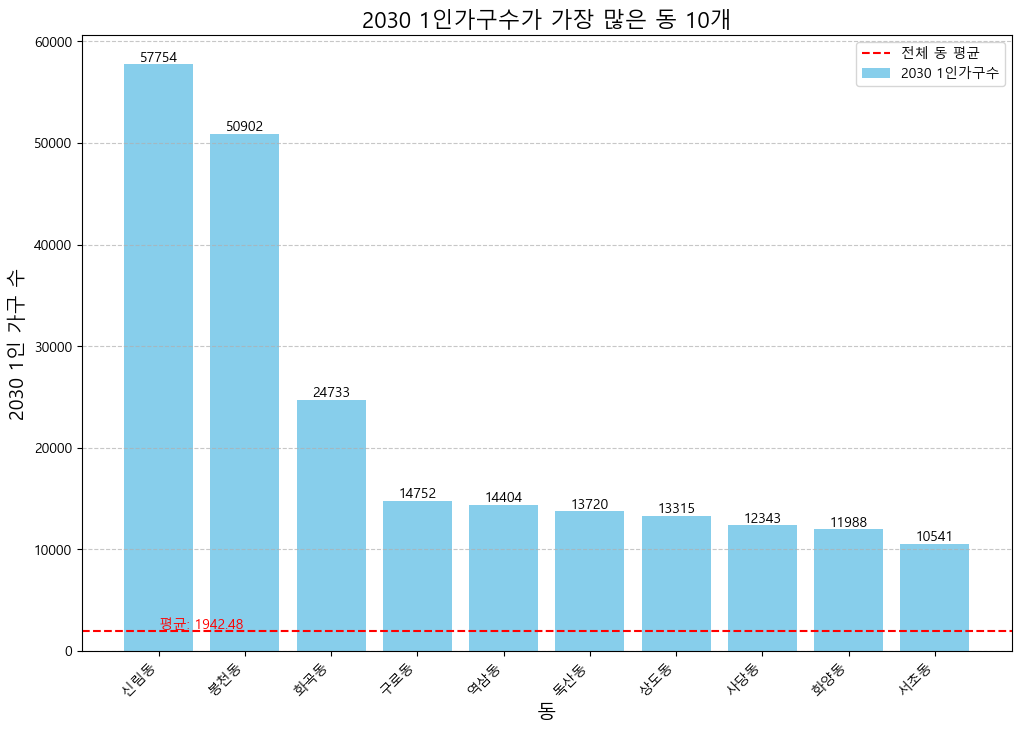

In [98]:
# 2030 세대수가 가장 큰 동 10개 찾기
top10_towns_age = data.sort_values(by='연령구간세대수', ascending=False).head(10)

# 전체 동의 평균 계산
average_age_value = data['연령구간세대수'].mean()
q1_value_age = np.percentile(data['연령구간세대수'], 25)
q3_value_age = np.percentile(data['연령구간세대수'], 75)

# 막대 그래프로 시각화
plt.figure(figsize=(12, 8))
bars = plt.bar(top10_towns_age['town_name'], top10_towns_age['연령구간세대수'], color='skyblue', label='2030 1인가구수')
plt.axhline(y=average_age_value, color='red', linestyle='--', label='전체 동 평균')
plt.title('2030 1인가구수가 가장 많은 동 10개', fontsize=16)
plt.xlabel('동', fontsize=14)
plt.ylabel('2030 1인 가구 수', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 각 막대에 값 annotation
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             int(bar.get_height()), ha='center', va='bottom')

# 전체 동의 평균 annotation
plt.text(0, average_age_value, f'평균: {average_age_value:.2f}', color='red', ha='left', va='bottom')

plt.legend()
plt.show()


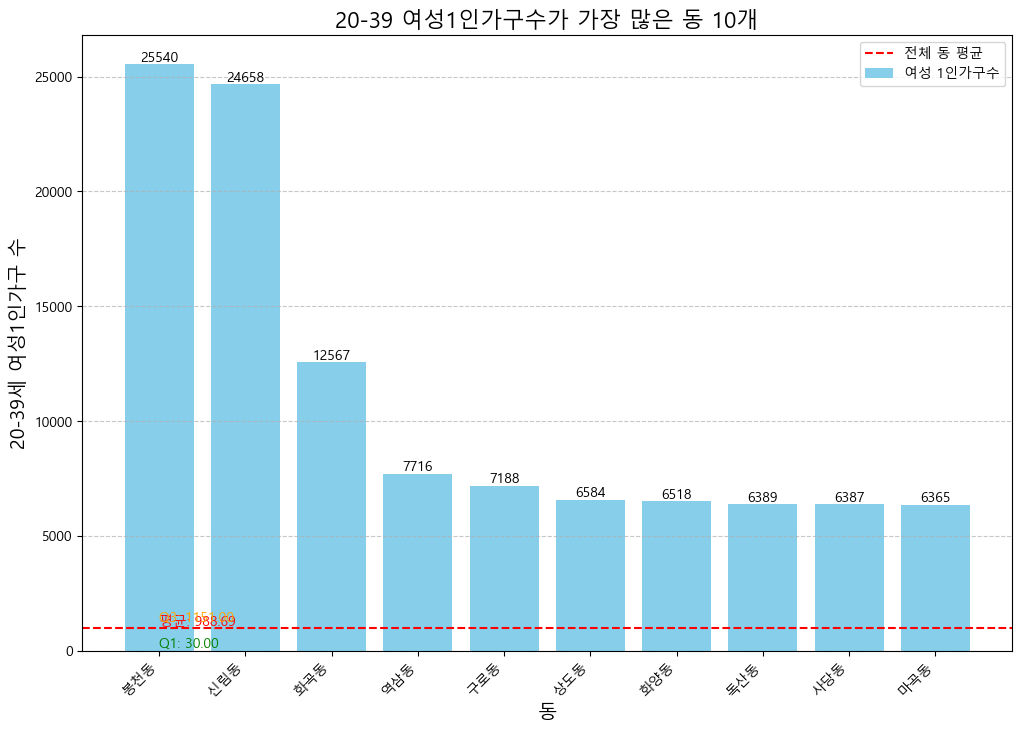

In [99]:
# 여성 연령구간세대수가 가장 큰 동 10개 찾기
top10_towns_women = data.sort_values(by='여_연령구간세대수', ascending=False).head(10)

# 전체 동의 평균 계산
average_value_women = data['여_연령구간세대수'].mean()
q1_value_women = np.percentile(data['여_연령구간세대수'], 25)
q3_value_women = np.percentile(data['여_연령구간세대수'], 75)

# 막대 그래프로 시각화
plt.figure(figsize=(12, 8))
bars = plt.bar(top10_towns_women['town_name'], top10_towns_women['여_연령구간세대수'], color='skyblue', label='여성 1인가구수')
plt.axhline(y=average_value_women, color='red', linestyle='--', label='전체 동 평균')
plt.title('20-39 여성1인가구수가 가장 많은 동 10개', fontsize=16)
plt.xlabel('동', fontsize=14)
plt.ylabel('20-39세 여성1인가구 수', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 각 막대에 값 annotation
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             int(bar.get_height()), ha='center', va='bottom')

# 전체 동의 평균 annotation
plt.text(0, average_value_women, f'평균: {average_value_women:.2f}', color='red', ha='left', va='bottom')
plt.text(0, q1_value_women, f'Q1: {q1_value_women:.2f}', color='green', ha='left', va='bottom')
plt.text(0, q3_value_women, f'Q3: {q3_value:.2f}', color='orange', ha='left', va='bottom')

plt.legend()
plt.show()
